C:\Users\arcve\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[[ 0  8  8  7  0  1  0  3  1  2  5  1  2  2  1  8]
 [ 0  8  4  1  2  1  2  2  1  1  7  3  8  4  2  2]
 [ 0 14  0  9  1 10  0  1  0  3  7  5  1  3  0  1]
 [ 0 13  2  4  0  4  1  0  2  5 11  0 13  1  1  5]
 [ 0  8  0  4  6 10  1  1  4 21 11  0  1  0  0 11]
 [ 0 12  0  7 12  0  3  0  4  6 19  0  1  1  1  0]
 [ 0  0  0 21 20  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


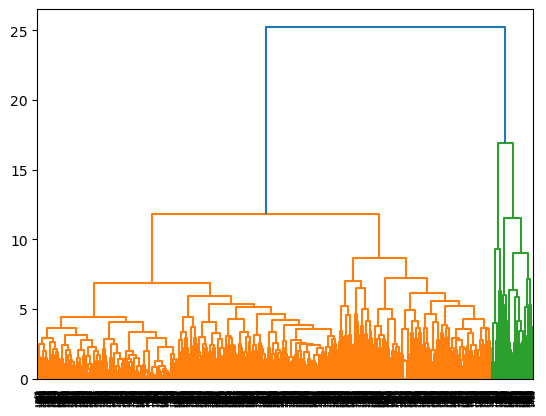

What the heirarchical cluster is showing is that the best number of clusters is in the 15-23 range if we want to separate into two groups
However, if we want to separate into further groups (in the case of our data, we have 7 classifications), then we may want to choose more clusters


In [5]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('BMI_MasterData.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

kmeans = KMeans(n_clusters = 15, n_init = 20).fit(Xtrain)

Xtrain = kmeans.transform(Xtrain)
# Xtest = kmeans.transform(Xtest)

ypred_selected = kmeans.predict(Xtest)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print(cmr_selected)

# HClust = AgglomerativeClustering
# hc_comp = HClust(distance_threshold=0, n_clusters = None, linkage = 'complete')
# hc_comp.fit(Xtrain)

# # hc_avg = HClust(distance_threshold=0, n_clusters=None,linkage='average')
# # hc_avg.fit(X)

# fig,ax = plt.subplots
# dendrogram(hc_comp)
# plt.show()


# hc_comp_scale = HClust(distance_threshold=0,
#                        n_clusters=None,
#                        linkage='complete').fit(Xtrain)
# linkage_comp_scale = linkage(hc_comp_scale)
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# dendrogram(linkage_comp_scale, ax=ax, **cargs)


complete_clustering = linkage(Xtrain, method="complete", metric="euclidean")
dendrogram(complete_clustering)
plt.show()

print("What the heirarchical cluster is showing is that the best number of clusters is in the 15-23 range if we want to separate into two groups")
print("However, if we want to separate into further groups (in the case of our data, we have 7 classifications), then we may want to choose more clusters")

